In [552]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, \
    cross_val_predict
from sklearn.base import clone, BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
    f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#### Dataset
 - Descarga de dataset MNIST
 - Formato datos
 - Obtención conjunto de entrenamiento y test

In [2]:
# Dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
# En general, los datasets de sklearn tienen una estructura de diccionar similar
# Contiene entre otras cosas, un df de datos, una serie de etiquetas y una
# descripción del dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Se convierten a arrays
X, y = np.array(X), np.array(y)
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

#### Exercise 1
- Construir un clasificador que alcance alrededor de un 97% de accuracy en el
  conjunto de test

In [ ]:
knn_cls = KNeighborsClassifier()

In [12]:
param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}]

knn_cls = KNeighborsClassifier()

grid_search = GridSearchCV(knn_cls, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=3)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.942) total time=  50.8s
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.944) total time=  46.0s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.970, test=0.945) total time=  46.0s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.972, test=0.938) total time=  45.8s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.945) total time=  45.8s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.942) total time=  45.1s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.946) total time=  44.8s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.945) total time=  45.9s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.941) total time=  45.6s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [13]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [14]:
grid_search.best_score_

0.9465166666666667

In [18]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.7903

In [19]:
param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}]

knn_cls = KNeighborsClassifier()

grid_search = GridSearchCV(knn_cls, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.985, test=0.972) total time= 6.0min
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.971) total time=  24.4s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  24.2s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  24.8s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.970) total time=  25.8s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  24.9s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  24.7s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  25.2s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  24.4s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [20]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [21]:
grid_search.best_score_

0.9716166666666666

In [22]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [23]:
# El escalado del conjunto de entrenamiento ha perjudicado notablemente el
# rendimiento del modelo en el conjunto de test

#### Exercise 2
- Data Augmentation: Por cada imagen del dataset crear cuatro copias de la      misma con cambios en cuatro direcciones (izquierda, derecha, arriba, abajo)
- Entrenar el algoritmo con este nuevo dataset

In [24]:
from scipy.ndimage.interpolation import shift

In [47]:
def shift_image(image, dx, dy):
    shifted_image = shift(image.reshape(28,28), [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape(-1)

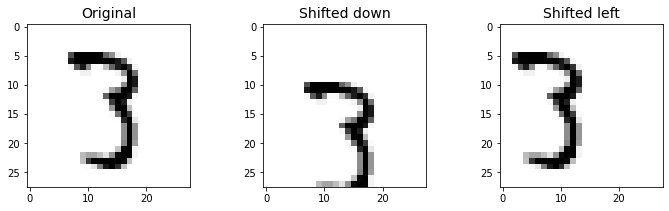

In [50]:
image = X_train[356]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [85]:
X_train_augmented, y_train_augmented = list(zip(*[
    (shift_image(img, d[0], d[1]), label) if not i==0 else (img, label) 
    for img, label in zip(X_train, y_train) 
    for i, d in enumerate(((0,0),(1,0),(-1,0),(0,1),(0,-1)))
]))

In [91]:
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented, random_state=0)

In [93]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [97]:
X_train_augmented.shape, y_train_augmented.shape

((300000, 784), (300000,))

In [112]:
knn_cls = KNeighborsClassifier(**grid_search.best_params_)

In [113]:
knn_cls.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [114]:
y_pred = knn_cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

#### Exercise 3
- Descargar dataset Titanic de kaggle
- Análisis exploratorio
- Preparación de los datos
- Selección de modelo y ajuste fino de hiperparámetros
- Entrenar modelo
- Predicción

Objetivo: Predecir si un pasajero sobrevivió o no basado en atributos

In [116]:
import urllib.request

In [185]:
titanic_path = os.path.join('..\\..', 'datasets', 'titanic')
download_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_data(url, path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ('train.csv', 'test.csv'):
        if not os.path.isfile(os.path.join(path, filename)):
            print('Downloading', filename)
            urllib.request.urlretrieve(url + filename, os.path.join(path, filename))

In [186]:
fetch_data(download_url, titanic_path)

In [188]:
train_data = pd.read_csv(os.path.join(titanic_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(titanic_path, 'test.csv'))

In [190]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
# Se establece la columna identificador pasajero como columna índice
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [193]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
# Valores faltantes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [201]:
# Los atributos edad, cabina y embargo contienen valores faltantes. 
# - Se descarta el atributo cabina porque falta el 77% de los valores.
# - El atributo edad contiene un 20% de NAs --> imputar con mediana edad

# Los atributos nombre y ticket no son de utilidad. Se descartan

In [202]:
# estadísticas atributos numéricos
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
# El porcentaje de supervivientes es del 38%. Accuracy puede ser buena métrica
# para evaluar el modelo.
# El 50% de los pasajeros pertenece a la clase 3
# El 75% de los pasajeros tiene una edad inferior a 38 años. El promedio de
# edad es inferior a 30 años
# El 75% de los pasajeros no tiene hermanos/as o esposos/as a bordo
# Casi ningun pasajero tiene relación de padres e hijos a bordo (>75%)
# El promedio del coste del ticket es de 32$ y para el 75% de los pasajeros
# el coste su coste fue inferior a 31$

In [205]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [206]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [207]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [208]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [210]:
# Se construyen los pipelines de preprocesamiento

In [211]:
# Pipeline para atributos numéricos

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [214]:
# Pipeline para atributos categóricos

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [216]:
# Pipeline de procesamiento
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [217]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [219]:
# Etiquetas
y_train = train_data['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [222]:
# Entranamiento del clasificador random forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [224]:
# Predicciones
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [226]:
# Al no haber etiquetas de test, se realiza validación cruzada para tener una
# idea de qué tal lo está haciendo el modelo.
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

In [227]:
forest_scores

array([0.75555556, 0.79775281, 0.76404494, 0.80898876, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.84269663])

In [228]:
forest_scores.mean()

0.8137578027465668

In [232]:
# Entrenamiento del clasificador support vector machine
svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf,X_train, y_train, cv=10)

In [233]:
svm_scores

array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.85393258, 0.84269663])

In [234]:
svm_scores.mean()

0.8249313358302123

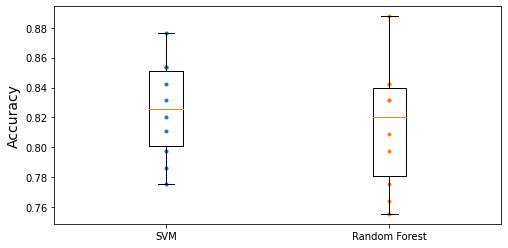

In [242]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

#### Exercise 4
Construir un clasificador de spam

In [250]:
import tarfile

In [269]:
# Descarga y descomprime el dataset
DOWNLOAD_ROOT = 'https://spamassassin.apache.org/old/publiccorpus/'
HAM_URL = DOWNLOAD_ROOT + '20030228_easy_ham.tar.bz2'
SPAM_URL = DOWNLOAD_ROOT + '20030228_spam.tar.bz2'
SPAM_PATH = os.path.join('..\\..', "datasets", "spam")

In [280]:
def fetch_spam_data(ham_url, spam_url, spam_path):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for url in (ham_url, spam_url):
        filename = os.path.basename(url)
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            print('Descargando dataset', filename)
            urllib.request.urlretrieve(url, path)
        print('Descomprimiendo dataset', filename)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [264]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [281]:
fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH)

Descargando dataset 20030228_easy_ham.tar.bz2
Descomprimiendo dataset 20030228_easy_ham.tar.bz2
Descargando dataset 20030228_spam.tar.bz2
Descomprimiendo dataset 20030228_spam.tar.bz2


In [283]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")

In [287]:
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [288]:
len(ham_filenames), len(spam_filenames)

(2500, 500)

In [282]:
import email
import email.policy

In [310]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else 'easy_ham'
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [311]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [314]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [316]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [317]:
# Estructura de los correos electrónicos

In [331]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [332]:
from collections import Counter

In [333]:
def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [351]:
# Los correos que no son spam generalmente son texto plano.
# Además, a veces pueden venir firmados con PGP 
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [352]:
# Los correso que son spam también tienen texto plano pero además contienen html
# No contienen firma PGP
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [353]:
# La estructura del correo puede ser útil
# Ahora se analizan las cabeceras

In [356]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [361]:
# Información útil en la cabecera
spam_emails[0]['Subject']

'Life Insurance - Why Pay More?'

In [369]:
# Se dividide el conjunto de datos en train y test
X = np.array(ham_emails + spam_emails, dtype=object) # array de objetos email
y = np.array([0]*len(ham_emails) + [1]*len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2400, 600, 2400, 600)

In [430]:
# Preprocesado
# Se convierte primero el html en texto plano con regex (alternativa BeautifulSoup)
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [432]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [433]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [438]:
# Convierte correo en texto plano
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [440]:
print(email_to_text(sample_html_spam)[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [444]:
# Se reducen las palabras a su raiz (stemming)
import nltk

In [445]:
try:

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [448]:
# Se reemplazan las urls por la palabra URL
import urlextract

In [449]:
try:
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [471]:
# Se recopilan todos los preprocesados realizados anteriormente
# - Convertir email a texto plano
# - Reemplazar urls palabra URL
# - Extraer la raiz de las palabras de cada correo
# - Pasar todo el texto a minúsculas
# - Reemplazar los números por la palabra 'NUMBER'
# - Eliminar los signos de puntuación
# - Se convierten los correos en conteos de palabras
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [482]:
# Se prueba la clase
X_sample = X_train[:5]
X_sample_prep_wordcounts = EmailToWordCounterTransformer().fit_transform(X_sample)
X_sample_prep_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [490]:
from scipy.sparse import csr_matrix

In [531]:
# Se convierten los conteos de palabras a vectores con el tamaño de vocabulario que se especifique
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None): # Se construye el vocabulario
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10) # A las palabras que son muy frecuentes se les asigna un conteo máximo de 10
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None): # Se construyen los vectores
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [540]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_sample_vectors = vocab_transformer.fit_transform(X_sample_prep_wordcounts)
X_sample_vectors

<5x11 sparse matrix of type '<class 'numpy.intc'>'
	with 39 stored elements in Compressed Sparse Row format>

In [542]:
# En la primera columna (0), se incluyen los conteos de las palabras que no 
# están en el vocabulario. Las restantes columnas corresponden con los conteos
# de palabras del vocabulario
X_sample_vectors.toarray()

array([[  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [105,  11,   3,   8,   9,   1,   1,   1,   2,   2,   0],
       [ 67,   0,   3,   2,   1,   0,   4,   2,   0,   1,   1],
       [ 48,   1,   6,   1,   1,   2,   2,   1,   2,   0,   0],
       [ 88,   6,   2,   2,   1,   8,   1,   3,   1,   2,   4]],
      dtype=int32)

In [543]:
vocab_transformer.vocabulary_

{'the': 1,
 'to': 2,
 'and': 3,
 'of': 4,
 'a': 5,
 'url': 6,
 'in': 7,
 'i': 8,
 'on': 9,
 'number': 10}

In [544]:
# Pipeline de preprocesamiento
preprocess_pipeline = Pipeline([
    ('email_to_wordcount', EmailToWordCounterTransformer()),
    ('wordcount_to_vector', WordCounterToVectorTransformer())
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [545]:
X_train_transformed

<2400x1001 sparse matrix of type '<class 'numpy.intc'>'
	with 188522 stored elements in Compressed Sparse Row format>

In [546]:
X_train_transformed.toarray()

array([[ 3,  0,  0, ...,  0,  0,  0],
       [41,  0, 11, ...,  0,  0,  0],
       [16,  1,  0, ...,  0,  0,  0],
       ...,
       [86, 29, 20, ...,  1,  0,  0],
       [12,  6,  2, ...,  0,  0,  0],
       [78, 28, 11, ...,  0,  0,  0]], dtype=int32)

In [548]:
# Entrenamiento
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
scores = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.981) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.984) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.990) total time=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


In [549]:
scores

array([0.98125, 0.98375, 0.99   ])

In [551]:
scores.mean()

0.985

In [553]:
X_test_transformed = preprocess_pipeline.transform(X_test)

In [554]:
X_test_transformed

<600x1001 sparse matrix of type '<class 'numpy.intc'>'
	with 49804 stored elements in Compressed Sparse Row format>

In [555]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [556]:
y_pred = log_clf.predict(X_test_transformed)

In [557]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [558]:
# Precision
precision_score(y_test, y_pred)

0.96875

In [559]:
# Recall
recall_score(y_test, y_pred)

0.9789473684210527